**Table of contents**<a id='toc0_'></a>    
- 1. [人工神经网络](#toc1_)    
  - 1.1. [最早的神经元算法](#toc1_1_)    
  - 1.2. [感知器算法](#toc1_2_)    
    - 1.2.1. [罗森布拉特感知器规则（Rosenblatt）](#toc1_2_1_)    
    - 1.2.2. [自适应性神经元（Adaline）](#toc1_2_2_)    
    - 1.2.3. [区别](#toc1_2_3_)    
  - 1.3. [scik-learning软件库](#toc1_3_)    
    - 1.3.1. [加载数据集](#toc1_3_1_)    
    - 1.3.2. [训练感知器](#toc1_3_2_)    
      - 1.3.2.1. [拆分训练集和测试集](#toc1_3_2_1_)    
      - 1.3.2.2. [预处理特征值](#toc1_3_2_2_)    
      - 1.3.2.3. [训练模型和预测结果](#toc1_3_2_3_)    
  - 1.4. [逻辑回归分类](#toc1_4_)    
  - 1.5. [支持向量机](#toc1_5_)    
  - 1.6. [核支持向量机求解非线性问题](#toc1_6_)    
  - 1.7. [决策树学习](#toc1_7_)    
  - 1.8. [通过随机森林组合多个决策树](#toc1_8_)    
  - 1.9. [K-近邻——一种懒惰的学习算法](#toc1_9_)    
- 2. [特征工程](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[人工神经网络](#toc0_)

## 1.1. <a id='toc1_1_'></a>[最早的神经元算法](#toc0_)

最早的神经元模型：麦库洛-皮（MCP）神经元

![Alt text](image.png)


## 1.2. <a id='toc1_2_'></a>[感知器算法](#toc0_)

### 1.2.1. <a id='toc1_2_1_'></a>[罗森布拉特感知器规则（Rosenblatt）](#toc0_)

1. 把权重初始化为0或者为小的随机数
2. 对每个训练样本：  
  a. 计算输出值  
  b. 更新权重  

  ![Alt text](image-3.png)

In [60]:
import numpy as np

class Perceptron():
    '''Perceptron classifier.
    Parameters
    ------
    eta : float         # 学习效率
    n_iter : int        # 训练次数
    random_state : int  # 随机数的种子
    
    Attributes
    ------
    w_ : 1d-array 一维数组
    errors_ : list 
    '''
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_inter
        self.random_state = random_state

    def fit(self, X, y):
        '''Fit training data.
        Parameters
        ------
        X : 
        y :
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # 标准差为0.01的正态分布
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                # print(errors)
            self.errors_.append(errors)

    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:] + self.w_[0])

    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [61]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


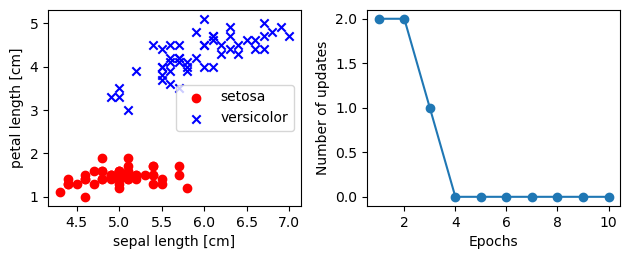

In [62]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.figure()
plt.subplot(221)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()

plt.subplot(222)
ppn = Perceptron(eta=0.1, n_inter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


('red', 'blue')


<Axes: >

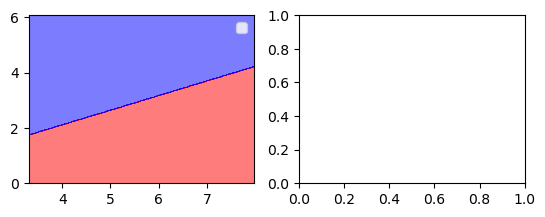

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
resolution = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))

Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.figure()
plt.subplot(221)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(colors[:len(np.unique(y))]))
print(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, cmap=ListedColormap(('red', 'blue')), alpha=0.3)
plt.legend()
plt.subplot(222)
# plt.imshow(xx1, xx2, Z.reshape(xx1.shape))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(305, 235)
(305, 235)


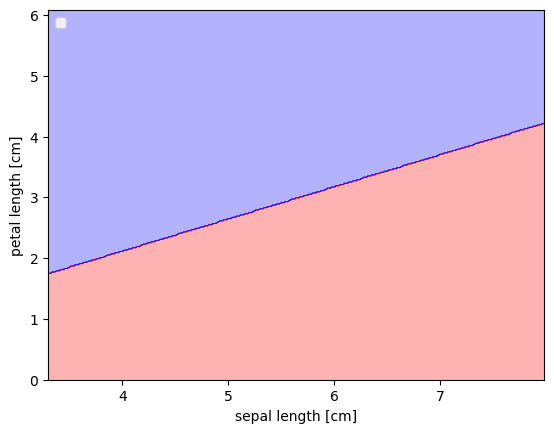

In [103]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # for idx, cl in enumerate(np.unique(y)):
    #     plt.scatter(x=X[y == cl, 0], 
    #                 y=X[y == cl, 1],
    #                 alpha=0.8, 
    #                 c=colors[idx],
    #                 marker=markers[idx], 
    #                 label=cl, 
    #                 edgecolor='black')
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

### 1.2.2. <a id='toc1_2_2_'></a>[自适应性神经元（Adaline）](#toc0_)

![Alt text](image-5.png)

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float 学习效率
      Learning rate (between 0.0 and 1.0)
    n_iter : int 迭代次数
      Passes over the training dataset.
    random_state : int 随机数种子
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array 一维数组
      Weights after fitting.
    cost_ : list 增量误差
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features] [样品数目, 特征数目]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples] [特征值]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)                       # 误差值：实际值-计算值
            self.w_[1:] += self.eta * X.T.dot(errors)   # 权重更新：+= eta * 特征的矩阵 * 误差向量 （变导数展开后结果）
            self.w_[0] += self.eta * errors.sum()       # 更新偏置（bias）：+= eta * 误差之和
            cost = (errors**2).sum() / 2.0              # 误差平方和 / 2
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]      # w1*x1 + w2*x2 + ... + wi*xi + 偏置(bias)

    def activation(self, X):
        """Compute linear activation"""
        return X                                        # 激活函数为线性函数

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

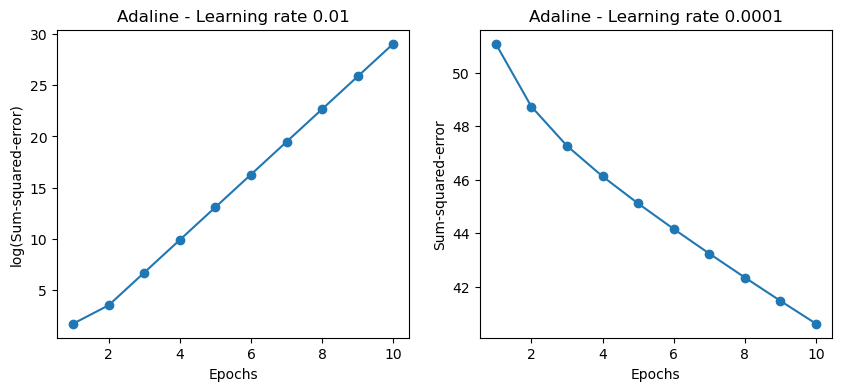

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [ ]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

C:\Users\zhao\AppData\Local\Temp\ipykernel_15620\78910532.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


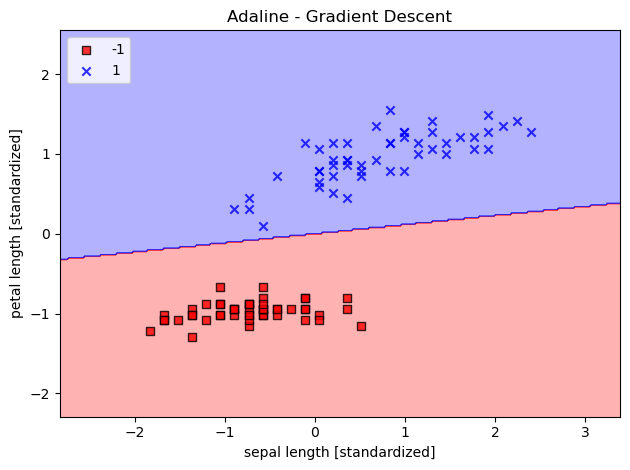

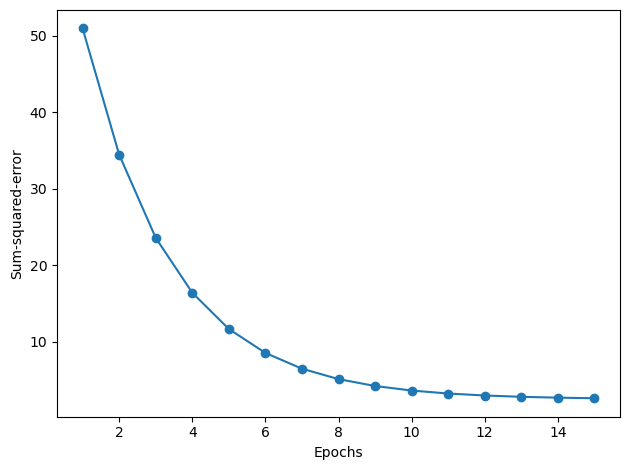

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
# plt.show()

### 1.2.3. <a id='toc1_2_3_'></a>[区别](#toc0_)

[详见](https://www.jianshu.com/p/3c271d59b14c)

[神经网络](https://zhuanlan.zhihu.com/p/342959259)

## 1.3. <a id='toc1_3_'></a>[scik-learning软件库](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>[加载数据集](#toc0_)

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [ ]:
print(iris.data)
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(iris.target)
print(np.unique(iris.target))
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 1 2]
['setosa' 'versicolor' 'virginica']


### 1.3.2. <a id='toc1_3_2_'></a>[训练感知器](#toc0_)

#### 1.3.2.1. <a id='toc1_3_2_1_'></a>[拆分训练集和测试集](#toc0_)

In [ ]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


#### 1.3.2.2. <a id='toc1_3_2_2_'></a>[预处理特征值](#toc0_)

- 归一化
- 标准化

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
print(X_train_std)
X_test_std = sc.transform(X_test)
print(X_test_std)

[[-0.4301064   2.63118533 -1.33269725 -1.30728421]
 [-0.55053619  0.76918392 -1.16537974 -1.30728421]
 [ 0.65376173  0.30368356  0.84243039  1.44587881]
 [ 1.0150511   0.53643374  1.0655204   1.18367281]
 [-1.03225536  0.30368356 -1.44424226 -1.30728421]
 [ 1.0150511   0.07093339  1.0097479   1.57698181]
 [ 2.09891923 -0.16181679  1.56747294  1.18367281]
 [-0.06881702  2.16568498 -1.44424226 -1.30728421]
 [ 1.61720006 -0.16181679  1.12129291  0.5281578 ]
 [ 0.89462131 -0.39456697  0.45202286  0.1348488 ]
 [-1.03225536 -1.79106803 -0.27301968 -0.2584602 ]
 [-0.79139578 -0.86006732  0.06161534  0.2659518 ]
 [-1.39354474  0.30368356 -1.38846976 -1.30728421]
 [ 0.29247235 -0.62731714  0.50779537  0.0037458 ]
 [-0.4301064  -1.32556767  0.11738784  0.1348488 ]
 [-0.06881702 -0.86006732  0.73088538  0.92146681]
 [-1.27311494  0.76918392 -1.05383474 -1.30728421]
 [-1.03225536 -2.48931856 -0.16147468 -0.2584602 ]
 [-0.06881702 -0.86006732  0.06161534  0.0037458 ]
 [-1.39354474  0.30368356 -1.22

#### 1.3.2.3. <a id='toc1_3_2_3_'></a>[训练模型和预测结果](#toc0_)

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print(y_pred)
print(ppn.score(X_test_std, y_pred))

[2 0 0 1 1 1 2 1 2 0 0 2 0 0 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
1.0


## 1.4. <a id='toc1_4_'></a>[逻辑回归分类](#toc0_)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

print(lr.score(X_test_std, y_pred))

1.0


## 1.5. <a id='toc1_5_'></a>[支持向量机](#toc0_)

## 1.6. <a id='toc1_6_'></a>[核支持向量机求解非线性问题](#toc0_)

## 1.7. <a id='toc1_7_'></a>[决策树学习](#toc0_)

## 1.8. <a id='toc1_8_'></a>[通过随机森林组合多个决策树](#toc0_)

## 1.9. <a id='toc1_9_'></a>[K-近邻——一种懒惰的学习算法](#toc0_)

# 2. <a id='toc2_'></a>[特征工程](#toc0_)